In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import LogisticRegression

In [2]:
# data import
cols_to_include = ["UGDS", "PREDDEG", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN", "UGDS_AIAN", "UGDS_NHPI", "UGDS_2MOR", "UGDS_NRA", "UGDS_UNKN", "UGDS_MEN", "CONTROL"] # selecting undergraduate demographic data and response
df = pd.read_csv("college_scorecard_202122_data.csv", usecols = cols_to_include)

df = df.loc[df.PREDDEG < 4] # eliminate schools offering only graduate degrees
df = df.loc[df.UGDS > 0] # ensure that remaining schools have enrolled undergraduates
df = df.drop("PREDDEG", axis=1)

df.head()

,CONTROL,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,UGDS_MEN
0,1.0,5098.0,0.0184,0.8978,0.0114,0.0014,0.0027,0.0010,0.0108,0.0086,0.0479,0.4060
1,1.0,13284.0,0.5297,0.2458,0.0669,0.0767,0.0021,0.0004,0.0483,0.0233,0.0068,0.3790
2,2.0,251.0,0.2470,0.6932,0.0438,0.0000,0.0000,0.0040,0.0000,0.0000,0.0120,0.3147
3,1.0,7358.0,0.7196,0.0871,0.0610,0.0357,0.0080,0.0012,0.0446,0.0166,0.0261,0.5953
4,1.0,3495.0,0.0152,0.9259,0.0129,0.0020,0.0017,0.0014,0.0132,0.0166,0.0112,0.3505


In [3]:
# filtering data to remove NaNs and creating X,y
X = df.drop("CONTROL", axis=1)
y = df["CONTROL"]

X = X.drop("UGDS", axis=1)

<AxesSubplot:>

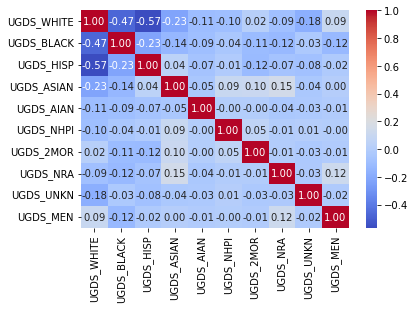

In [4]:
# Generate heatmap of correlation matrix for columns
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [5]:
y.value_counts(normalize=True)

3.0    0.392758
1.0    0.332347
2.0    0.274896
Name: CONTROL, dtype: float64

In [6]:
# data standardization and splitting
X_values = X.values 
std_scaler = StandardScaler() 
X_scaled = std_scaler.fit_transform(X_values)
X_std = pd.DataFrame(X_scaled, columns=X.columns) 

X_train, X_test, y_train, y_test = train_test_split(X_std, y)

I will now train the first set of models. I will train a multiclass logistic regression model with no regularization, L2-regularization, and L1-regularization. For each regularization, I will perform an initial and a fine-grained cross-validation, using modified code from the solution to Homework 3 for more appealing graphs of the validation curves. 

This data is the standardized percentages for each demographic category. The control response still has all 3 classes. 

In [7]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter=5000, fit_intercept=True, multi_class='multinomial', penalty='none')
logreg.fit(X_train, y_train)
nonscore = logreg.score(X_test, y_test)
print(f"Nonregularized score is {nonscore}")

Nonregularized score is 0.6107242339832869


[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
[0.39577543 0.58263472 0.61443824 0.61350989 0.61350989 0.61350989]


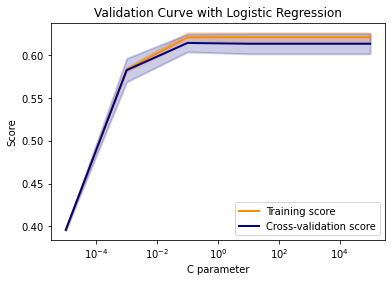

In [8]:
logregl2 = LogisticRegression(solver = 'lbfgs', max_iter=5000, fit_intercept=True, multi_class='multinomial', penalty='l2')
param_range = np.logspace(-5,5, 6)
print(param_range)

train_scores, test_scores = validation_curve(
   logregl2, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

[  0.1          0.39810717   1.58489319   6.30957344  25.11886432
 100.        ]
[0.61443824 0.61351016 0.61350989 0.61350989 0.61350989 0.61350989]


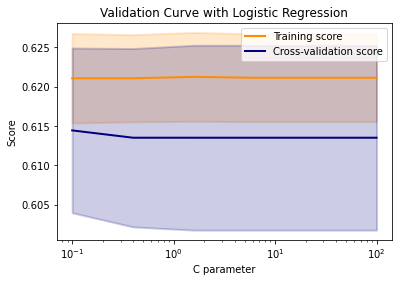

In [9]:
param_range = np.logspace(-1, 2, 6)
print(param_range)

train_scores, test_scores = validation_curve(
   logregl2, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [10]:
logregl2.set_params(C = 0.1)
logregl2.fit(X_train, y_train)
l2score = logregl2.score(X_test, y_test)
print(f"L2-regularized score is {l2score}")

L2-regularized score is 0.6107242339832869


[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
[0.39577543 0.39577543 0.61211697 0.61350989 0.61350989 0.61350989]


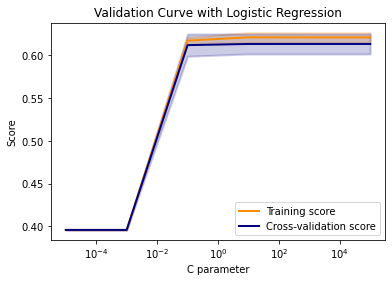

In [11]:
logregl1 = LogisticRegression(solver = 'saga', max_iter=5000, fit_intercept=True, multi_class='multinomial', penalty='l1')
param_range = np.logspace(-5,5, 6)
print(param_range)

train_scores, test_scores = validation_curve(
    logregl1, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

#Plot the CV error as a function of hyperparameter
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

[  10.           25.11886432   63.09573445  158.48931925  398.10717055
 1000.        ]
[0.61350989 0.61350989 0.61350989 0.61350989 0.61350989 0.61350989]


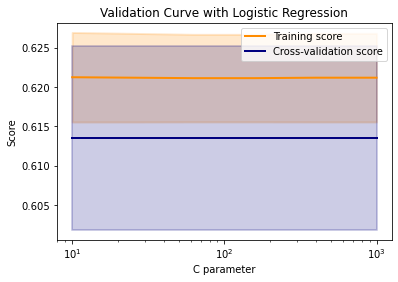

In [12]:
param_range = np.logspace(1, 3, 6)
print(param_range)

train_scores, test_scores = validation_curve(
    logregl1, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

#Plot the CV error as a function of hyperparameter
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [13]:
logregl1.set_params(C = 10)
logregl1.fit(X_train, y_train)
l1score = logregl1.score(X_test, y_test)
print(f"L1-regularized score is {l1score}")

L1-regularized score is 0.6107242339832869


In [14]:
scores = {"Nonregularized score": nonscore, "L2 score": l2score, "L1 score": l1score}
for score in scores:
    print(f"{score}: {scores[score]}")

Nonregularized score: 0.6107242339832869
L2 score: 0.6107242339832869
L1 score: 0.6107242339832869


Interestingly, all 3 models have exactly the same test performance. Model coefficients will be examined below. 

In [15]:
logreg.coef_

array([[ 0.13920496, -0.0957002 ,  0.01005314,  0.0465476 ,  0.15297083,
         0.01683752,  0.09929681, -0.17044878, -0.33998693,  0.24764686],
       [ 0.12335818, -0.12360281, -0.19635019, -0.02114329,  0.01535667,
        -0.08177792, -0.10344428,  0.48750959,  0.16205407,  0.31895242],
       [-0.26256315,  0.21930301,  0.18629706, -0.0254043 , -0.1683275 ,
         0.06494041,  0.00414747, -0.31706082,  0.17793285, -0.56659927]])

In [16]:
logregl2.coef_

array([[ 0.13765971, -0.09550969,  0.00913187,  0.04551528,  0.14998285,
         0.01545067,  0.09813482, -0.16833398, -0.33010728,  0.24472469],
       [ 0.12353317, -0.12209732, -0.19314708, -0.01940854,  0.01259873,
        -0.07852889, -0.10092777,  0.47427433,  0.15733438,  0.31553772],
       [-0.26119288,  0.217607  ,  0.18401521, -0.02610675, -0.16258158,
         0.06307822,  0.00279295, -0.30594035,  0.1727729 , -0.56026241]])

In [17]:
logregl1.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.05805512,  0.12811944,
         0.        ,  0.09907888, -0.00242608, -0.50876291,  0.07912978],
       [ 0.01997545,  0.        , -0.1771173 ,  0.        ,  0.        ,
        -0.09395003, -0.09839222,  0.66290266,  0.00357744,  0.15046562],
       [-0.42979628,  0.2931224 ,  0.15333577, -0.02120742, -0.20002272,
         0.04483669,  0.        , -0.15523001,  0.        , -0.73483702]])

In [18]:
whitemale = [1,0,0,0,0,0,0,0,0,1]
whitefemale = [1,0,0,0,0,0,0,0,0,0]
blackmale = [0,1,0,0,0,0,0,0,0,1]
blackfemale = [0,1,0,0,0,0,0,0,0,0]
hispmale = [0,0,1,0,0,0,0,0,0,1]
hispfemale = [0,0,1,0,0,0,0,0,0,0]
asianmale = [0,0,0,1,0,0,0,0,0,1]
asianfemale = [0,0,0,1,0,0,0,0,0,0]
aianmale = [0,0,0,0,1,0,0,0,0,1]
aianfemale = [0,0,0,0,1,0,0,0,0,0]
nhpimale = [0,0,0,0,0,1,0,0,0,1]
nhpifemale = [0,0,0,0,0,1,0,0,0,0]
mormale = [0,0,0,0,0,0,1,0,0,1]
morfemale = [0,0,0,0,0,0,1,0,0,0]
rnamale = [0,0,0,0,0,0,0,1,0,1]
rnafemale = [0,0,0,0,0,0,0,1,0,0]
unknmale = [0,0,0,0,0,0,0,0,1,1]
unknfemale = [0,0,0,0,0,0,0,0,1,0]

extremes = pd.DataFrame(np.array([whitemale, whitefemale, blackmale, blackfemale, hispmale, hispfemale, asianmale, asianfemale, 
                    aianmale, aianfemale, nhpimale, nhpifemale, mormale, morfemale, rnamale, rnafemale, unknmale, unknfemale]), columns=X.columns)

pred = logregl1.predict(extremes)
pred

array([1., 1., 1., 3., 1., 3., 1., 1., 1., 1., 1., 3., 1., 1., 2., 2., 2.,
       3.])

The above cell tests hypothetical schools composed entirely of one demographic extreme to see how the model will catagorize them.  Notably, the schools composed entirely of Black women, Hispanic women, NHPI women, and women of unknown race are expected to be for-profit private schools. Schools composed entirely of non-resident alien individuals of either sex or men of unknown race are expected to be non-profit private schools. All other schools are expected to be public schools. 

The following code will combine the two categories of private schools into one column, making this a binary classification problem otherwise following the same procedure as above. The demographics are still in terms of standardized percentages.

In [19]:
# combining two private categories into one
for i in [y, y_train, y_test]:
    i = i.replace(3, 2, inplace=True)


In [20]:
y.value_counts(normalize=True)

2.0    0.667653
1.0    0.332347
Name: CONTROL, dtype: float64

In [21]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter=5000, fit_intercept=True, penalty='none')
logreg.fit(X_train, y_train)
nonscore = logreg.score(X_test, y_test)
print(f"Nonregularized score is {nonscore}")

Nonregularized score is 0.6337047353760445


[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
[0.67154121 0.67386086 0.6508824  0.65111496 0.65134697 0.65134697]


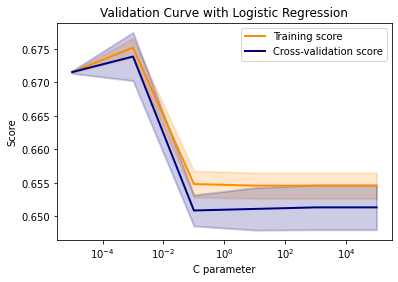

In [22]:
logregl2 = LogisticRegression(solver = 'lbfgs', max_iter=5000, fit_intercept=True, penalty='l2')
param_range = np.logspace(-5,5, 6)
print(param_range)

train_scores, test_scores = validation_curve(
   logregl2, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

[0.0001     0.00025119 0.00063096 0.00158489 0.00398107 0.01      ]
[0.67154121 0.67154121 0.67363019 0.66202091 0.65877103 0.655986  ]


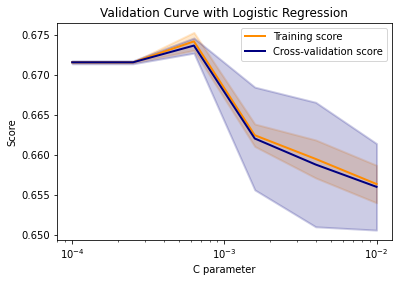

In [23]:
param_range = np.logspace(-4, -2, 6)
print(param_range)

train_scores, test_scores = validation_curve(
   logregl2, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [24]:
logregl2.set_params(C = 0.00063096)
logregl2.fit(X_train, y_train)
l2score = logregl2.score(X_test, y_test)
print(f"L2-regularized score is {l2score}")

L2-regularized score is 0.6580779944289693


[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]


C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[0.67154121 0.67154121 0.65273666 0.65111496 0.65134697 0.65134697]


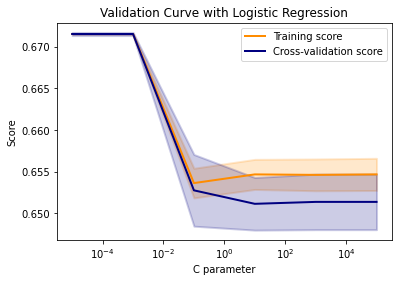

In [25]:
logregl1 = LogisticRegression(solver = 'saga', max_iter=5000, fit_intercept=True, multi_class='multinomial', penalty='l1')
param_range = np.logspace(-5,5, 6)
print(param_range)

train_scores, test_scores = validation_curve(
    logregl1, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

#Plot the CV error as a function of hyperparameter
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

[1.00000000e-05 2.51188643e-05 6.30957344e-05 1.58489319e-04
 3.98107171e-04 1.00000000e-03]
[0.67154121 0.67154121 0.67154121 0.67154121 0.67154121 0.67154121]


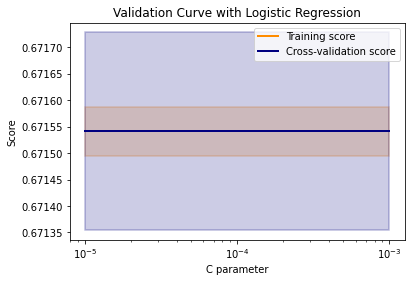

In [26]:
param_range = np.logspace(-5, -3, 6)
print(param_range)

train_scores, test_scores = validation_curve(
    logregl1, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

#Plot the CV error as a function of hyperparameter
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [27]:
logregl1.set_params(C = 10 ** -3)
logregl1.fit(X_train, y_train)
l1score = logregl1.score(X_test, y_test)
print(f"L1-regularized score is {l1score}")

L1-regularized score is 0.6559888579387186


In [28]:
scores = {"Nonregularized score": nonscore, "L2 score": l2score, "L1 score": l1score}
for score in scores:
    print(f"{score}: {scores[score]}")

Nonregularized score: 0.6337047353760445
L2 score: 0.6580779944289693
L1 score: 0.6559888579387186


Here, we can observe that the model with penalized loss perform the best, and the model with L2 penalty slightly outperforms the model with L1 penalty. However, these models all undercompare slightly to a model which just predicts that everything is a private school, which could indicate that this test performance is merely the percentage of test data which is a private school, which would indicate difficulty in truly predicting by these features. In particular, the L1 model coefficients should reveal this below. 

In [29]:
logreg.coef_

array([[-0.2441402 ,  0.15656409,  0.00904351, -0.1028459 , -0.2309363 ,
         0.01894978, -0.17256226,  0.37494154,  0.46751979, -0.36147222]])

In [30]:
logregl2.coef_

array([[-0.09804507,  0.08477097,  0.02678153, -0.01690318, -0.08292454,
         0.00114859, -0.0607276 ,  0.06289665,  0.10299849, -0.12304114]])

In [31]:
logregl1.coef_

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

The same procedure as above will be run again, this time converting the demographic percentages to number of students of each category. As before, a multiclass classification will be attempted, followed by a binary classification. Additionally, the following models omit the unknown race feature to enable commentary on known information. Unfortunately, because the classes have already been altered, I need a new train/test split. 

In [32]:
# trying again disregarding unknowns and converting to number of students
cols_to_include = ["UGDS", "PREDDEG", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN", "UGDS_AIAN", "UGDS_NHPI", "UGDS_2MOR", "UGDS_NRA", "UGDS_MEN", "CONTROL"] # selecting undergraduate demographic data and response
df = pd.read_csv("college_scorecard_202122_data.csv", usecols = cols_to_include)

df = df.loc[df.PREDDEG < 4] # eliminate schools offering only graduate degrees
df = df.loc[df.UGDS > 0] # ensure that remaining schools have enrolled undergraduates
df = df.drop("PREDDEG", axis=1)

features_to_convert = ["UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN", "UGDS_AIAN", "UGDS_NHPI", "UGDS_2MOR", "UGDS_NRA", "UGDS_MEN"] # selecting demographic percentages to convert
df[features_to_convert] = df[features_to_convert].mul(df['UGDS'], axis=0)
df = df.drop("UGDS", axis=1)

In [33]:
X = df.drop("CONTROL", axis=1)
y = df["CONTROL"]

X_values = X.values 
std_scaler = StandardScaler() 
X_scaled = std_scaler.fit_transform(X_values)
X_std = pd.DataFrame(X_scaled, columns=X.columns) 

X_train, X_test, y_train, y_test = train_test_split(X_std, y)

In [34]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter=5000, fit_intercept=True, multi_class='multinomial', penalty='none')
logreg.fit(X_train, y_train)
nonscore = logreg.score(X_test, y_test)
print(f"Nonregularized score is {nonscore}")

Nonregularized score is 0.6601671309192201


[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
[0.4115597  0.55896047 0.66248925 0.6747919  0.6747919  0.6747919 ]


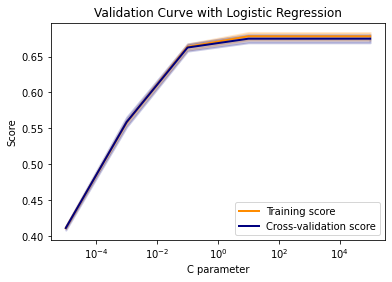

In [35]:
logregl2 = LogisticRegression(solver = 'lbfgs', max_iter=5000, fit_intercept=True, multi_class='multinomial', penalty='l2')
param_range = np.logspace(-5,5, 6)
print(param_range)

train_scores, test_scores = validation_curve(
   logregl2, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

[  10.           25.11886432   63.09573445  158.48931925  398.10717055
 1000.        ]
[0.6747919  0.67455988 0.6747919  0.6747919  0.6747919  0.6747919 ]


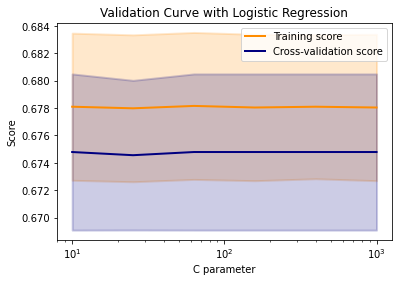

In [36]:
param_range = np.logspace(1, 3, 6)
print(param_range)

train_scores, test_scores = validation_curve(
   logregl2, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [37]:
logregl2.set_params(C = 63.09573445)
logregl2.fit(X_train, y_train)
l2score = logregl2.score(X_test, y_test)
print(f"L2-regularized score is {l2score}")

L2-regularized score is 0.6594707520891365


[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
[0.39182896 0.39182896 0.66829214 0.67479244 0.67502445 0.67548849]


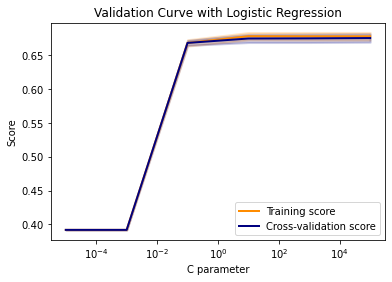

In [38]:
logregl1 = LogisticRegression(solver = 'saga', max_iter=5000, fit_intercept=True, multi_class='multinomial', penalty='l1')
param_range = np.logspace(-5,5, 6)
print(param_range)

train_scores, test_scores = validation_curve(
    logregl1, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

#Plot the CV error as a function of hyperparameter
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

[  10.           25.11886432   63.09573445  158.48931925  398.10717055
 1000.        ]
[0.67502445 0.67456015 0.67479217 0.67502419 0.67525647 0.67502445]


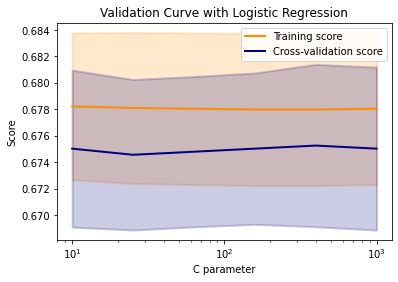

In [39]:
param_range = np.logspace(1, 3, 6)
print(param_range)

train_scores, test_scores = validation_curve(
    logregl1, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

#Plot the CV error as a function of hyperparameter
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [40]:
logregl1.set_params(C = 398.10717055)
logregl1.fit(X_train, y_train)
l1score = logregl1.score(X_test, y_test)
print(f"L1-regularized score is {l1score}")

L1-regularized score is 0.6601671309192201


In [41]:
scores = {"Nonregularized score": nonscore, "L2 score": l2score, "L1 score": l1score}
for score in scores:
    print(f"{score}: {scores[score]}")

Nonregularized score: 0.6601671309192201
L2 score: 0.6594707520891365
L1 score: 0.6601671309192201


Here, the L1-regularized and nonregularized models perform best, but all models have similar coefficients due to only very small regularization.

In [42]:
logreg.coef_

array([[ 2.80373683,  0.24555379,  0.52406135,  0.78403476,  0.70191927,
         0.05840039, -0.4910057 ,  0.76719816, -0.28198648],
       [ 1.61671658, -0.28855601, -0.24718198, -0.38869833, -0.5839924 ,
        -0.03850858, -0.22666471,  1.80314674,  0.53140683],
       [-4.4204534 ,  0.04300222, -0.27687937, -0.39533642, -0.11792687,
        -0.0198918 ,  0.71767041, -2.5703449 , -0.24942035]])

In [43]:
logregl2.coef_

array([[ 2.79784188,  0.24525341,  0.52282614,  0.78517373,  0.70173977,
         0.0583376 , -0.49011878,  0.76268481, -0.27818079],
       [ 1.61209195, -0.2884704 , -0.24785309, -0.38718117, -0.58400905,
        -0.03854738, -0.22572377,  1.79851686,  0.53333359],
       [-4.40993383,  0.04321699, -0.27497306, -0.39799256, -0.11773071,
        -0.01979022,  0.71584255, -2.56120167, -0.25515281]])

In [44]:
logregl1.coef_

array([[ 2.75690624,  0.23700417,  0.5038232 ,  0.78179099,  0.70224857,
         0.05857774, -0.49157083,  0.74780391, -0.2077196 ],
       [ 1.56959832, -0.29684233, -0.26776879, -0.39134305, -0.58392492,
        -0.03840568, -0.22676429,  1.78388094,  0.60591034],
       [-4.32908121,  0.05735083, -0.23347734, -0.387884  , -0.11574658,
        -0.01793415,  0.72050522, -2.53403918, -0.39800153]])

In [45]:
whitemale = [10000,0,0,0,0,0,0,0,10000]
whitefemale = [10000,0,0,0,0,0,0,0,0]
blackmale = [0,10000,0,0,0,0,0,0,10000]
blackfemale = [0,10000,0,0,0,0,0,0,0]
hispmale = [0,0,10000,0,0,0,0,0,10000]
hispfemale = [0,0,10000,0,0,0,0,0,0]
asianmale = [0,0,0,10000,0,0,0,0,10000]
asianfemale = [0,0,0,10000,0,0,0,0,0]
aianmale = [0,0,0,0,10000,0,0,0,10000]
aianfemale = [0,0,0,0,10000,0,0,0,0]
nhpimale = [0,0,0,0,0,10000,0,0,10000]
nhpifemale = [0,0,0,0,0,10000,0,0,0]
mormale = [0,0,0,0,0,0,10000,0,10000]
morfemale = [0,0,0,0,0,0,10000,0,0]
rnamale = [0,0,0,0,0,0,0,10000,10000]
rnafemale = [0,0,0,0,0,0,0,10000,0]


extremes = pd.DataFrame(np.array([whitemale, whitefemale, blackmale, blackfemale, hispmale, hispfemale, asianmale, asianfemale, 
                    aianmale, aianfemale, nhpimale, nhpifemale, mormale, morfemale, rnamale, rnafemale]), columns=X.columns)

pred = logregl1.predict(extremes)
pred

array([1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 3., 2., 2.])

Here, the only school predicted to be private for-profit is the one composed of 2 or more race females. Meanwhile, the schools composed of Black male, Hispanic male, NHPI male, 2 or more race males, and all non-resident alien populations are expected to be private nonprofit. As before, all other schools are expected to be public. 

In [46]:
# combining two private categories into one
for i in [y, y_train, y_test]:
    i = i.replace(3, 2, inplace=True)


In [47]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter=5000, fit_intercept=True, penalty='none')
logreg.fit(X_train, y_train)
nonscore = logreg.score(X_test, y_test)
print(f"Nonregularized score is {nonscore}")

Nonregularized score is 0.8001392757660167


[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
[0.66272073 0.73421775 0.79364172 0.79898354 0.79875152 0.79875152]


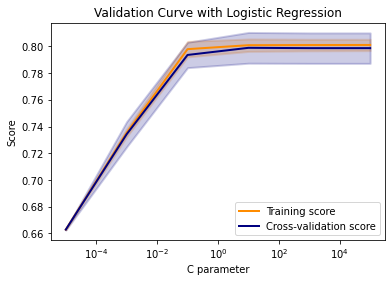

In [48]:
logregl2 = LogisticRegression(solver = 'lbfgs', max_iter=5000, fit_intercept=True, penalty='l2')
param_range = np.logspace(-5,5, 6)
print(param_range)

train_scores, test_scores = validation_curve(
   logregl2, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

[  1.           2.51188643   6.30957344  15.84893192  39.81071706
 100.        ]
[0.79967932 0.79967986 0.79944811 0.79921583 0.79898381 0.79875152]


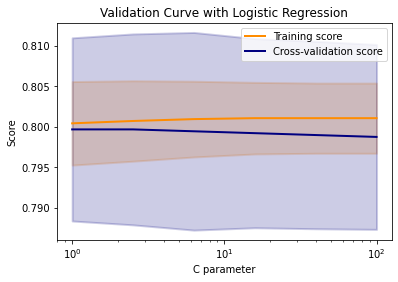

In [49]:
param_range = np.logspace(0, 2, 6)
print(param_range)

train_scores, test_scores = validation_curve(
   logregl2, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [50]:
logregl2.set_params(C = 2.51188643)
logregl2.fit(X_train, y_train)
l2score = logregl2.score(X_test, y_test)
print(f"L2-regularized score is {l2score}")

L2-regularized score is 0.8015320334261838


[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]


C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[0.66272073 0.66272073 0.79364172 0.79898354 0.79991188 0.79898381]


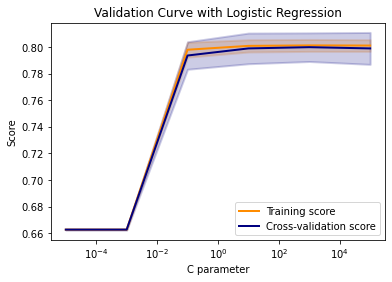

In [51]:
logregl1 = LogisticRegression(solver = 'saga', max_iter=5000, fit_intercept=True, multi_class='multinomial', penalty='l1')
param_range = np.logspace(-5,5, 6)
print(param_range)

train_scores, test_scores = validation_curve(
    logregl1, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

#Plot the CV error as a function of hyperparameter
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

[  100.           251.18864315   630.95734448  1584.89319246
  3981.07170553 10000.        ]


C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[0.79898381 0.79921583 0.79898381 0.79898381 0.79898381 0.79921583]


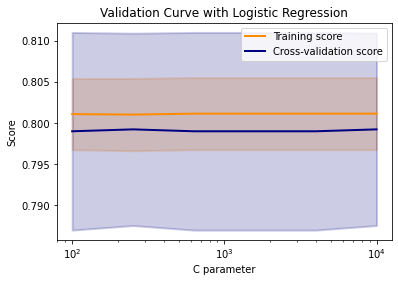

In [52]:
param_range = np.logspace(2, 4, 6)
print(param_range)

train_scores, test_scores = validation_curve(
    logregl1, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)

#Plot the CV error as a function of hyperparameter
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [53]:
logregl1.set_params(C = 251.18864315)
logregl1.fit(X_train, y_train)
l1score = logregl1.score(X_test, y_test)
print(f"L1-regularized score is {l1score}")

L1-regularized score is 0.8001392757660167


In [54]:
scores = {"Nonregularized score": nonscore, "L2 score": l2score, "L1 score": l1score}
for score in scores:
    print(f"{score}: {scores[score]}")

Nonregularized score: 0.8001392757660167
L2 score: 0.8015320334261838
L1 score: 0.8001392757660167


This set of models performs significantly better than any previous models. Notably, the L2 model very slightly outperforms the others, and the nonregularized model and L1 have the same performance. 

In [55]:
logreg.coef_

array([[-2.37604047, -0.56799407, -1.13332905, -1.38943838, -1.21076052,
        -0.09460142,  0.40748295,  1.19610129,  1.29850222]])

In [56]:
logregl2.coef_

array([[-2.26077345, -0.55026465, -1.08641008, -1.32993195, -1.20009194,
        -0.09315043,  0.38188634,  1.18515529,  1.14271304]])

In [57]:
logregl1.coef_

array([[-1.18100963, -0.28285419, -0.56343817, -0.69252514, -0.60525101,
        -0.04720991,  0.20310703,  0.5985998 ,  0.63840467]])

In [58]:
whitemale = [10000,0,0,0,0,0,0,0,10000]
whitefemale = [10000,0,0,0,0,0,0,0,0]
blackmale = [0,10000,0,0,0,0,0,0,10000]
blackfemale = [0,10000,0,0,0,0,0,0,0]
hispmale = [0,0,10000,0,0,0,0,0,10000]
hispfemale = [0,0,10000,0,0,0,0,0,0]
asianmale = [0,0,0,10000,0,0,0,0,10000]
asianfemale = [0,0,0,10000,0,0,0,0,0]
aianmale = [0,0,0,0,10000,0,0,0,10000]
aianfemale = [0,0,0,0,10000,0,0,0,0]
nhpimale = [0,0,0,0,0,10000,0,0,10000]
nhpifemale = [0,0,0,0,0,10000,0,0,0]
mormale = [0,0,0,0,0,0,10000,0,10000]
morfemale = [0,0,0,0,0,0,10000,0,0]
rnamale = [0,0,0,0,0,0,0,10000,10000]
rnafemale = [0,0,0,0,0,0,0,10000,0]


extremes = pd.DataFrame(np.array([whitemale, whitefemale, blackmale, blackfemale, hispmale, hispfemale, asianmale, asianfemale, 
                    aianmale, aianfemale, nhpimale, nhpifemale, mormale, morfemale, rnamale, rnafemale]), columns=X.columns)

pred = logregl1.predict(extremes)
pred

array([1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2.])

This model predicts that the schools of Black males, Hispanic males, AIAN males, NHPI males, and all people of 2 or more races and non-resident aliens will be private. Meanwhile, all remaining groups are expected to be public. 